In [1]:
from IPython.core.display import Image
Image(url= 'https://raw.githubusercontent.com/maayan318/datasciencemaayan/main/shutterstock_566476294.jpg', width=600, height=600)


### SHOW THE LAST ROWS OF THE FILE

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib as mpl
url='https://raw.githubusercontent.com/maayan318/datasciencemaayan/main/WAGE1.csv'
wage=pd.read_csv(url).copy()

wage=wage[['wage','educ','exper','tenure','nonwhite','female','married','northcen','west','south','profocc','clerocc','servocc']]
wage.tail()

,wage,educ,exper,tenure,nonwhite,female,married,northcen,west,south,profocc,clerocc,servocc
521,15.0,16,14,2,0,1,1,0,1,0,1,0,0
522,2.3,10,2,0,0,1,0,0,1,0,1,0,0
523,4.7,15,13,18,0,0,1,0,1,0,1,0,0
524,12.0,16,5,1,0,0,1,0,1,0,0,0,0
525,3.5,14,5,4,1,1,0,0,1,0,0,1,0


### CHEACKING MISSING VALUES AND THE TYPE OF OUR COLUMNS

In [3]:
wage.isnull().sum().sort_values(ascending=False)

servocc     0
clerocc     0
profocc     0
south       0
west        0
northcen    0
married     0
female      0
nonwhite    0
tenure      0
exper       0
educ        0
wage        0
dtype: int64

In [4]:
wage.dtypes

wage        float64
educ          int64
exper         int64
tenure        int64
nonwhite      int64
female        int64
married       int64
northcen      int64
west          int64
south         int64
profocc       int64
clerocc       int64
servocc       int64
dtype: object

#### WE BUILT A FUNCTION THAT MAKES OUR COLUMNS TO OBJECTS

In [5]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [6]:
new_data1=wage[['profocc','clerocc','servocc']]
piv=undummify(new_data1)

jobs=piv.stack().reset_index().drop(0,1)
wage['accupation']=jobs['level_1']

### compare the average between sex to wage,educ,exper,trade

In [7]:
p_female=wage.pivot_table(['wage','educ','exper','tenure' ],'female') 
p_female

,educ,exper,tenure,wage
female,,,,
0,12.788321,17.558394,6.474453,7.115328
1,12.317460,16.428571,3.615079,4.597341


##### we can see that the difference between the wage of female and male are extremely high and not match to the difference between their education and tenure

### female wage vs male wage

In [8]:
wage.groupby('female')['female'].count()

female
0    274
1    252
Name: female, dtype: int64

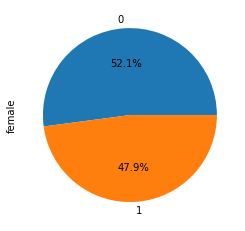

In [9]:
wage['female'].value_counts().plot.pie(autopct='%3.1f%%') 

In [10]:
female = wage.loc[wage.female == 1]
male = wage.loc[wage.female == 0]

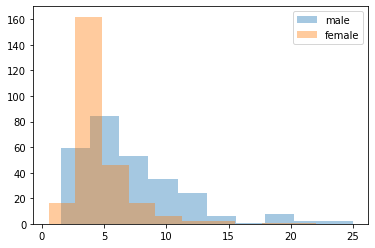

In [11]:
plt.hist(male['wage'], alpha=0.4, label='male')
plt.hist(female['wage'], alpha=0.4, label='female')
plt.legend(loc='upper right')

##### comparing between nonwhite to white people

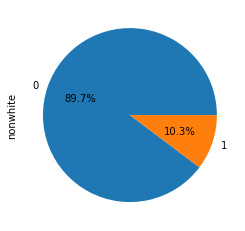

In [12]:
wage['nonwhite'].value_counts().plot.pie(autopct='%3.1f%%') 

In [13]:
wage.pivot_table(['wage','educ','exper' ],'nonwhite')

,educ,exper,wage
nonwhite,,,
0,12.641949,16.951271,5.959174
1,11.870370,17.592593,5.470370


##### we can see that the wage is higher and it match to the education but not to the experience,which help us understand that the education is nuch more important from experience when we talk about black vs white people


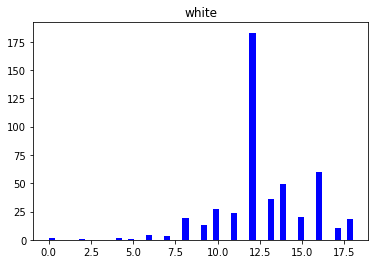

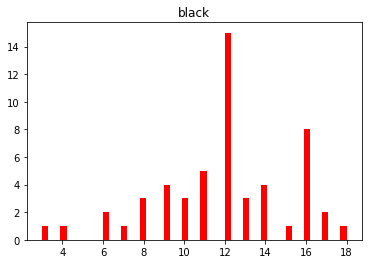

In [38]:
plt.title("white")
plt.hist(new_columns0['educ'],bins = 50 , color = 'Blue') 
plt.show()
plt.title("black")
plt.hist(new_columns1['educ'],bins = 50 , color = 'red') 
plt.show()


##### we can see in the hist that the education years of nonwhite people and white people are the same however there is a disparity between the wage of nonwhite people and white people which earn more money

In [14]:
p_married=wage.pivot_table(['wage','exper','tenure' ],'married')
p_married

,exper,tenure,wage
married,,,
0,11.660194,2.946602,4.856456
1,20.465625,6.493750,6.586562


##### married people have higher wage and also higher tenure and experience 

### nonwhite vs white people

#### Nonwhite

In [15]:
new_columns1=wage[wage['nonwhite']==1]
new_columns1
new_columns1.pivot_table(['wage','educ','exper','tenure'],'female')


,educ,exper,tenure,wage
female,,,,
0,11.517241,18.241379,6.896552,6.524138
1,12.280000,16.840000,3.560000,4.248000


#### White




In [16]:
new_columns0=wage[wage['nonwhite']==0]
new_columns0
new_columns0.pivot_table(['wage','educ','exper','tenure'  ],'female')


,educ,exper,tenure,wage
female,,,,
0,12.938776,17.477551,6.424490,7.185306
1,12.321586,16.383260,3.621145,4.635815


##### we can see that black people have less education but they earns more money what not happend at the white people
##### we can assume that their jobs not Requires a lots of  years of education

In [17]:
new_data1=wage[['profocc','clerocc','servocc']]
piv=undummify(new_data1)

jobs=piv.stack().reset_index().drop(0,1)
wage['accupation']=jobs['level_1']

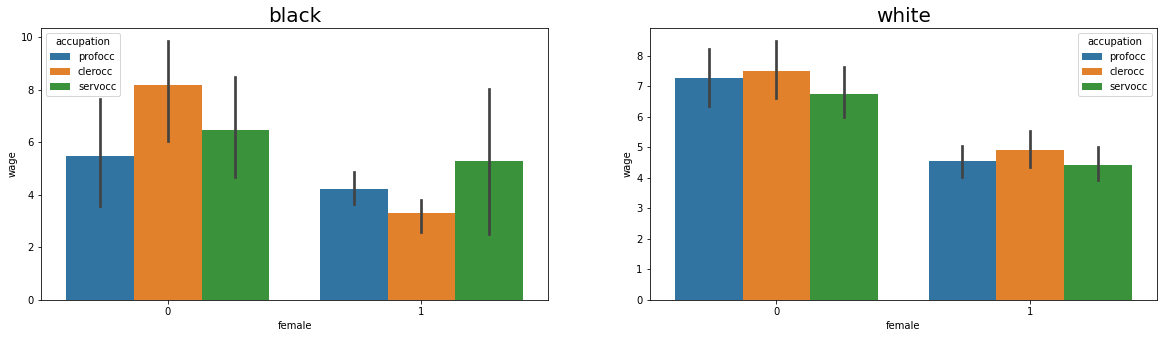

In [18]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=2)
barplotblack=sns.barplot(ax=axes[0], x="female", y="wage", hue="accupation",  data=new_columns1)
barplotblack.set_title('black',fontsize=20)
barplotwhite=sns.barplot(ax=axes[1], x="female", y="wage", hue="accupation",  data=new_columns0)
barplotwhite.set_title('white',fontsize=20)
plt.show()

#### the wage diffrence in white people between female and male are higher than the diffrence in nonwhite people
#### male in generale have higher wage then female
#### at service jobs nonwhite female get hiegher wages than nonwhite male 
#### we can see that in nonwhite people in generale, the diffrence in the wage is much higher than the differance in general in white people.



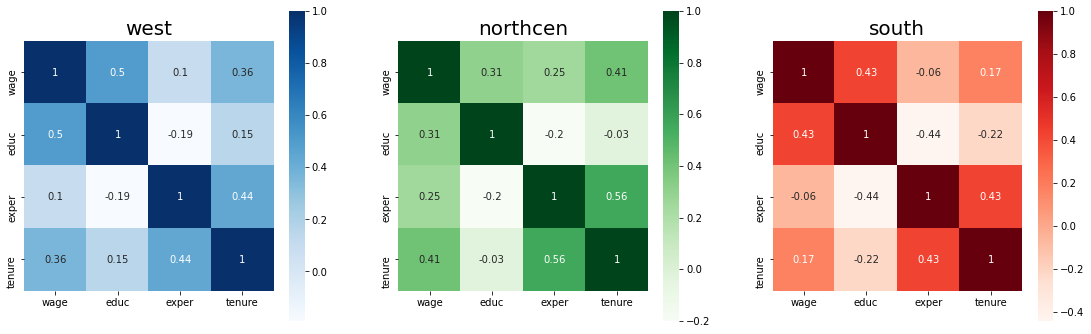

In [19]:
west=wage[wage['west']==1]
northcen=wage[wage['northcen']==1]
south=wage[wage['south']==1]
figures=['wage','educ','exper','tenure']
corr_mat=west[figures].corr().round(2)
corr_mat1=northcen[figures].corr().round(2)
corr_mat2=south[figures].corr().round(2)
fig=plt.figure(figsize=(19,19))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
ax1.set_title('west',fontsize=20)
ax2.set_title('northcen',fontsize=20)
ax3.set_title('south',fontsize=20)
sns.heatmap(data=corr_mat,ax=ax1,cmap='Blues',square=True,cbar_kws={'shrink':.3}, annot=True)
sns.heatmap(data=corr_mat1,ax=ax2,cmap='Greens',square=True,cbar_kws={'shrink':.3}, annot=True)
sns.heatmap(data=corr_mat2,ax=ax3,cmap='Reds',square=True,cbar_kws={'shrink':.3}, annot=True)
plt.show()


##### first we can see that it doesn't matter where you live the corrolation between experience and wage are the highest and second conclusion at the west the education effects the most on the wage

##### at the north and at the south the highest corrolation is between experience and tenure but the highest corrolation in the west is between wage to education
##### we can see that in the west the people with more education get highest wage 